# Lead Scoring Assignment 

In [415]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [417]:
# read the dataset
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [418]:
df.shape

(9240, 37)

In [419]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [421]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [422]:
## Data cleaning and prepartion

In [423]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [424]:
## We will drop columns having more than 3000 null values as that column will not give good insights.

In [425]:
cols_to_drop = [col for col in df.columns if df[col].isnull().sum() > 3000]
df.drop(cols_to_drop, axis=1, inplace=True)


In [426]:
## Check for the output 

In [427]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [428]:
# Rechecking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [429]:
df['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [430]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [431]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

there are some null values in important columns as seen above and by removing those null value will cost us a lot of data and they are important columns. Will replace the NaN values with 'unknown'. 

In [432]:
columns_to_fill = ['Specialization', 'What matters most to you in choosing a course', 'Country', 'What is your current occupation']
df[columns_to_fill] = df[columns_to_fill].fillna('unknown')
round(100*(df.isnull().sum()/len(df.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [433]:
df=df.drop(['Lead Profile'],axis=1)

In [434]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [435]:
df=df.drop(['How did you hear about X Education'],axis=1)

In [436]:
df['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [437]:
df["City"] = df['City'].fillna('unknown')

In [438]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [439]:
import seaborn as sns

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Text(0.5, 1.0, 'Lead Origin')

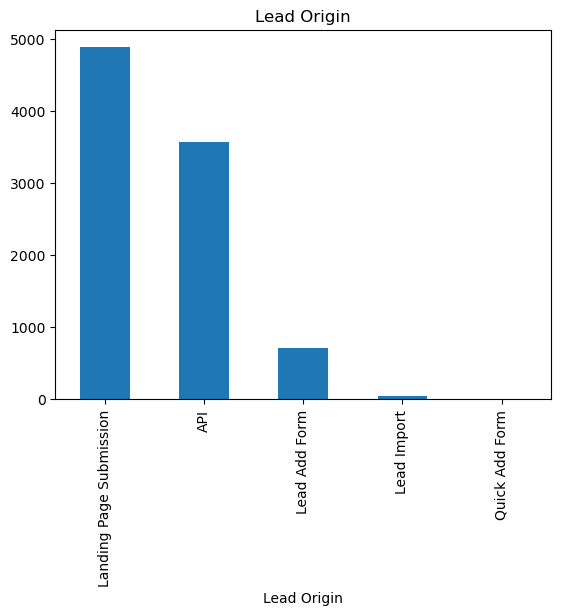

In [441]:
df['Lead Origin'].value_counts().plot.bar()
plt.title('Lead Origin')


Text(0.5, 1.0, 'Do Not Email')

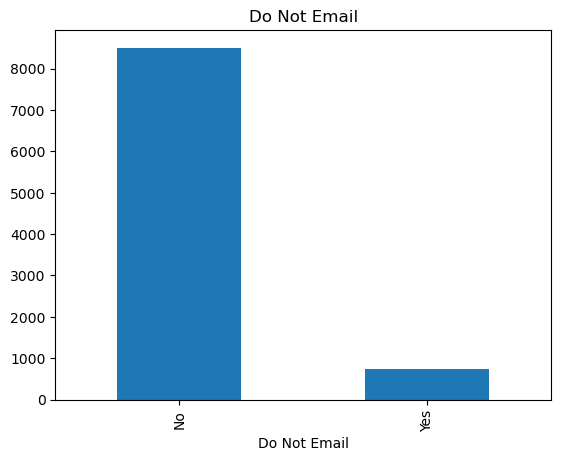

In [442]:
df['Do Not Email'].value_counts().plot.bar()
plt.title('Do Not Email')

Text(0.5, 1.0, 'Do Not Call')

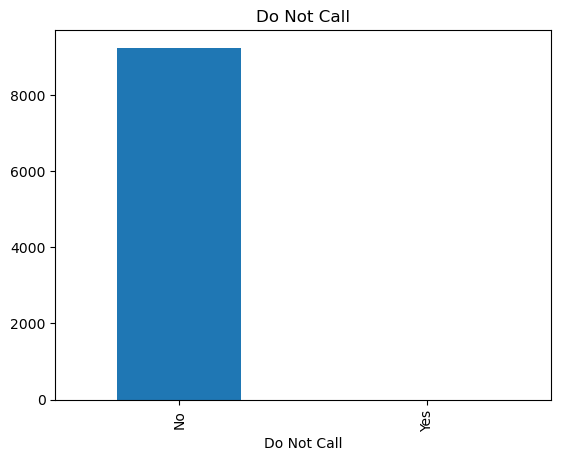

In [443]:
df['Do Not Call'].value_counts().plot.bar()
plt.title('Do Not Call')

Text(0.5, 1.0, 'Country')

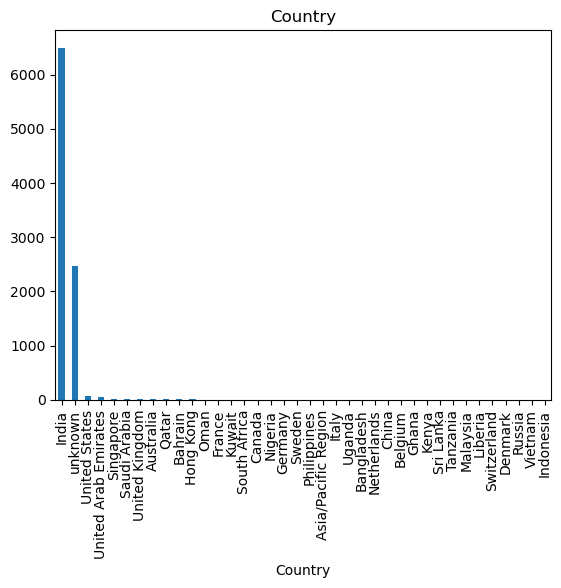

In [444]:
df['Country'].value_counts().plot.bar()
plt.title('Country')

Text(0.5, 1.0, 'Search')

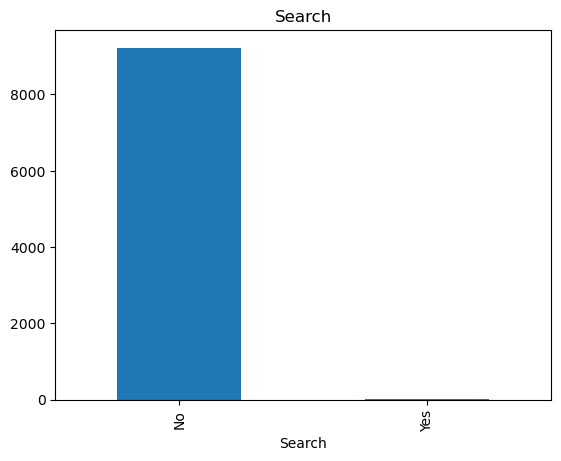

In [445]:
df['Search'].value_counts().plot.bar()
plt.title('Search')

Text(0.5, 1.0, 'Newspaper Article')

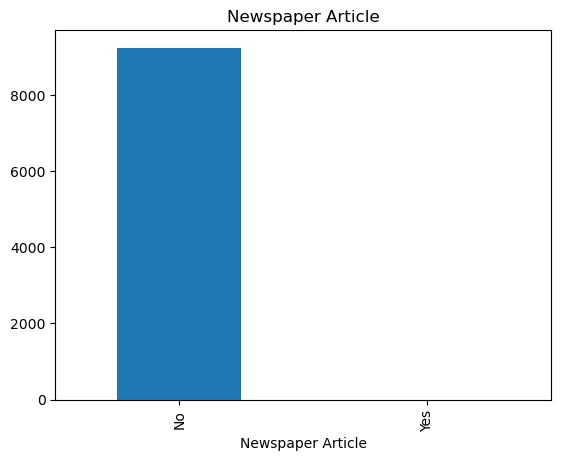

In [446]:
df['Newspaper Article'].value_counts().plot.bar()
plt.title('Newspaper Article')

Text(0.5, 1.0, 'X Education Forums')

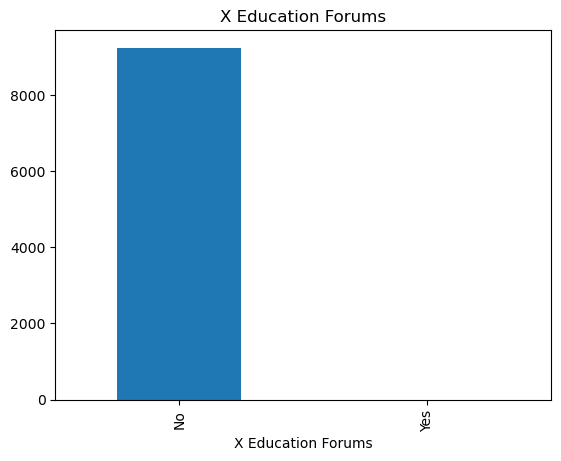

In [447]:
df['X Education Forums'].value_counts().plot.bar()
plt.title('X Education Forums')

Text(0.5, 1.0, 'Newspaper')

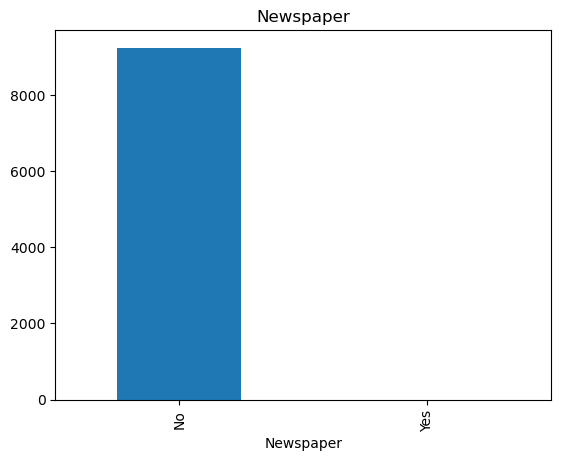

In [448]:
df['Newspaper'].value_counts().plot.bar()
plt.title('Newspaper')

Text(0.5, 1.0, 'Digital Advertisement')

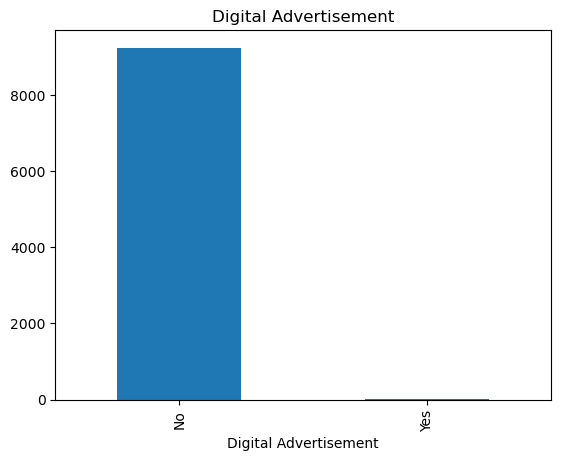

In [449]:
df['Digital Advertisement'].value_counts().plot.bar()
plt.title('Digital Advertisement')

Text(0.5, 1.0, 'Through Recommendations')

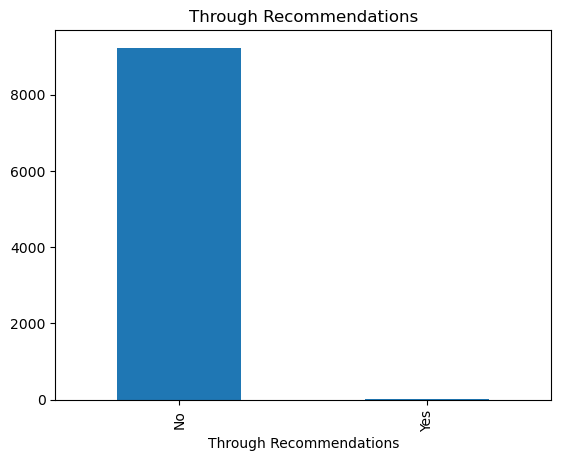

In [450]:
df['Through Recommendations'].value_counts().plot.bar()
plt.title('Through Recommendations')

Text(0.5, 1.0, 'A free copy of Mastering The Interview')

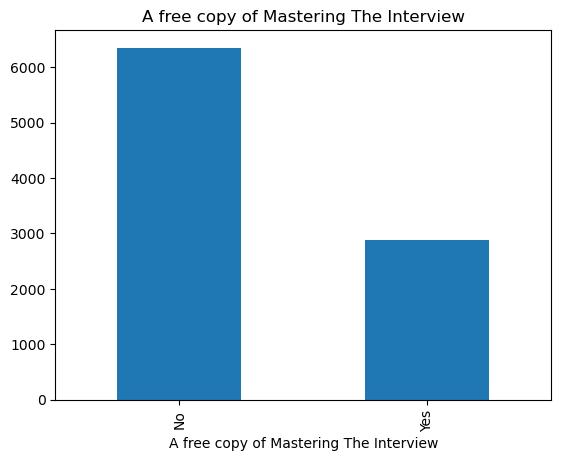

In [451]:
df['A free copy of Mastering The Interview'].value_counts().plot.bar()
plt.title('A free copy of Mastering The Interview')

Text(0.5, 1.0, 'Last Notable Activity')

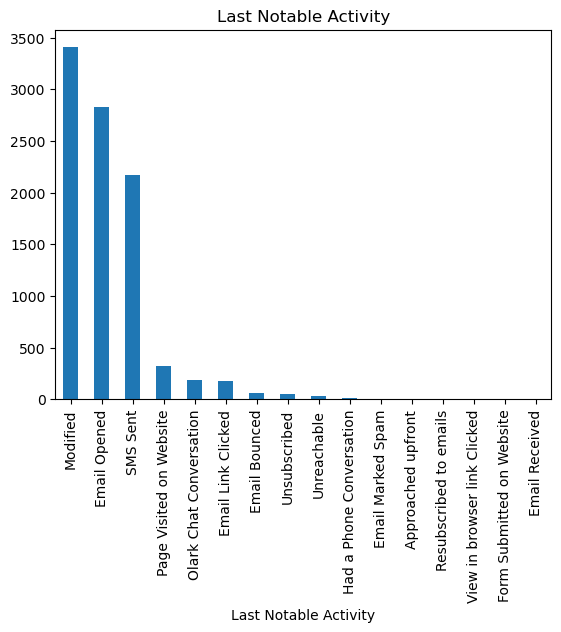

In [452]:
df['Last Notable Activity'].value_counts().plot.bar()
plt.title('Last Notable Activity')

Text(0.5, 1.0, 'Converted')

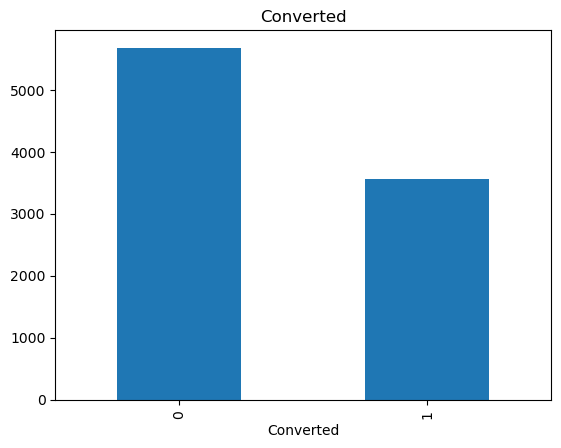

In [453]:
df['Converted'].value_counts().plot.bar()
plt.title('Converted')

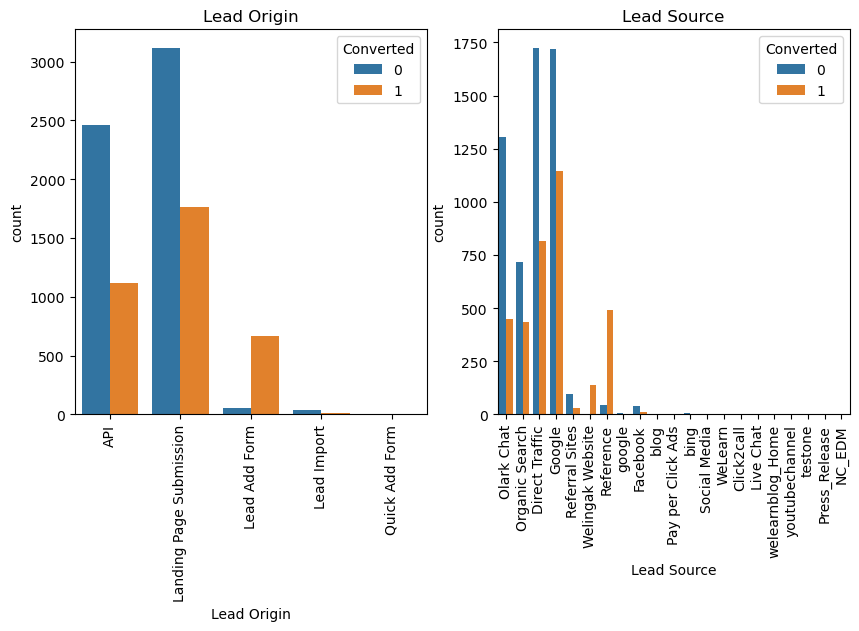

In [454]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

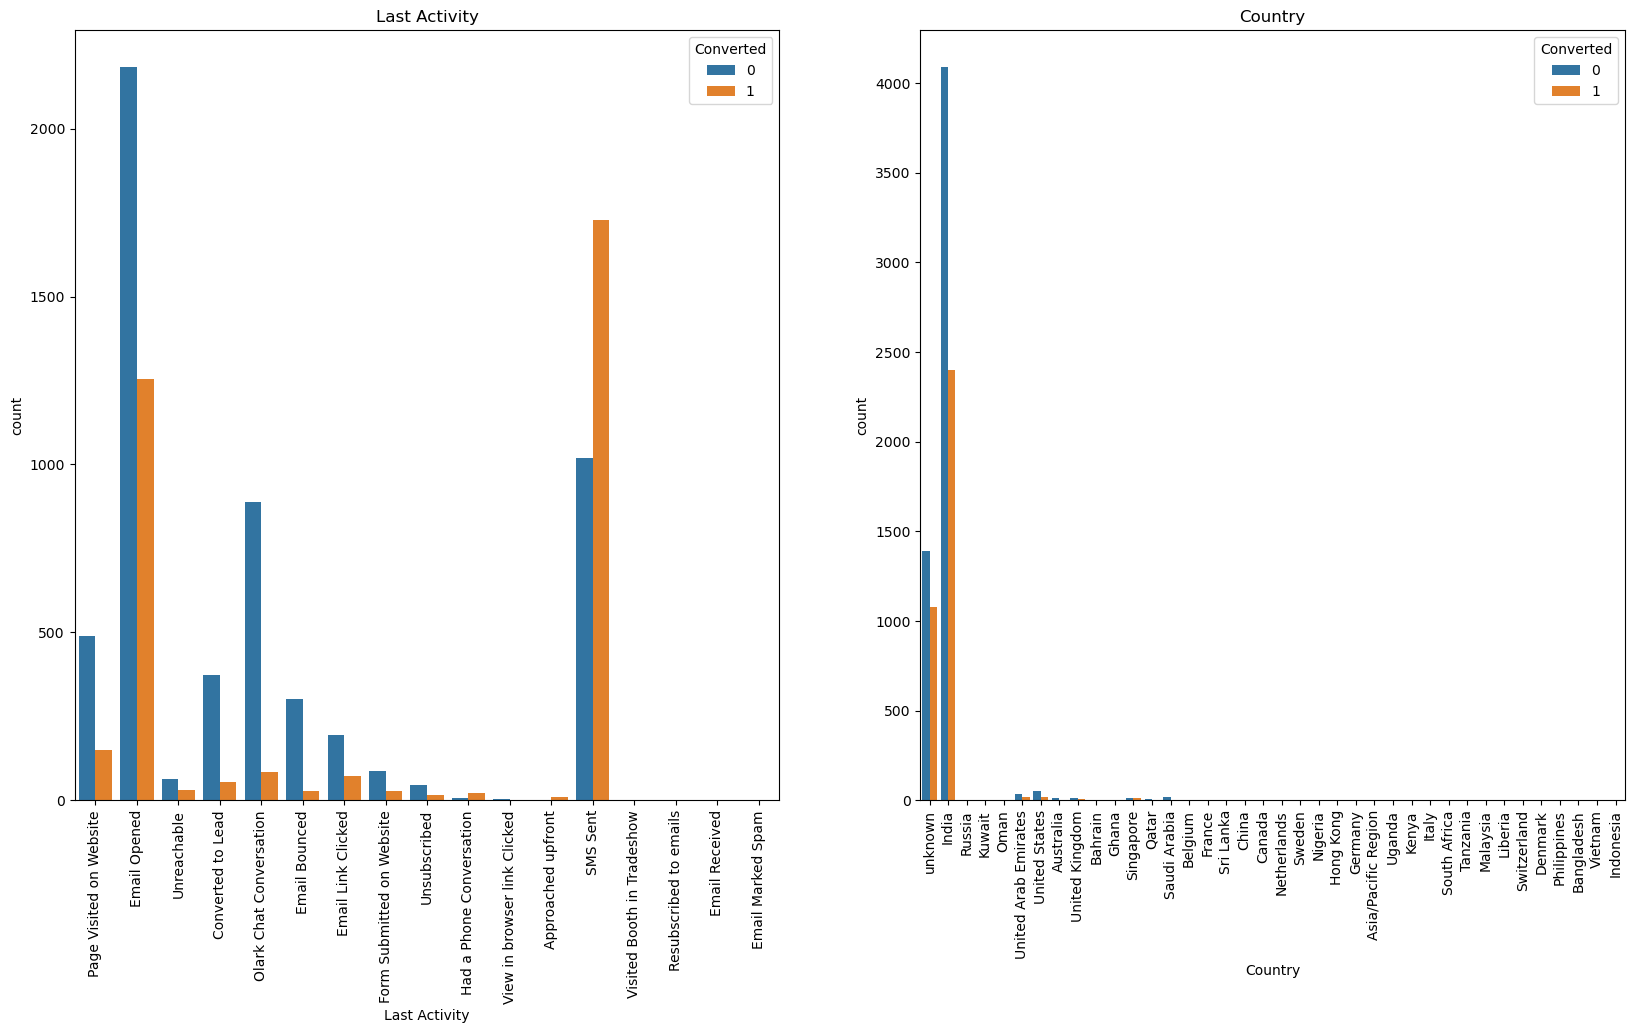

In [455]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.show()

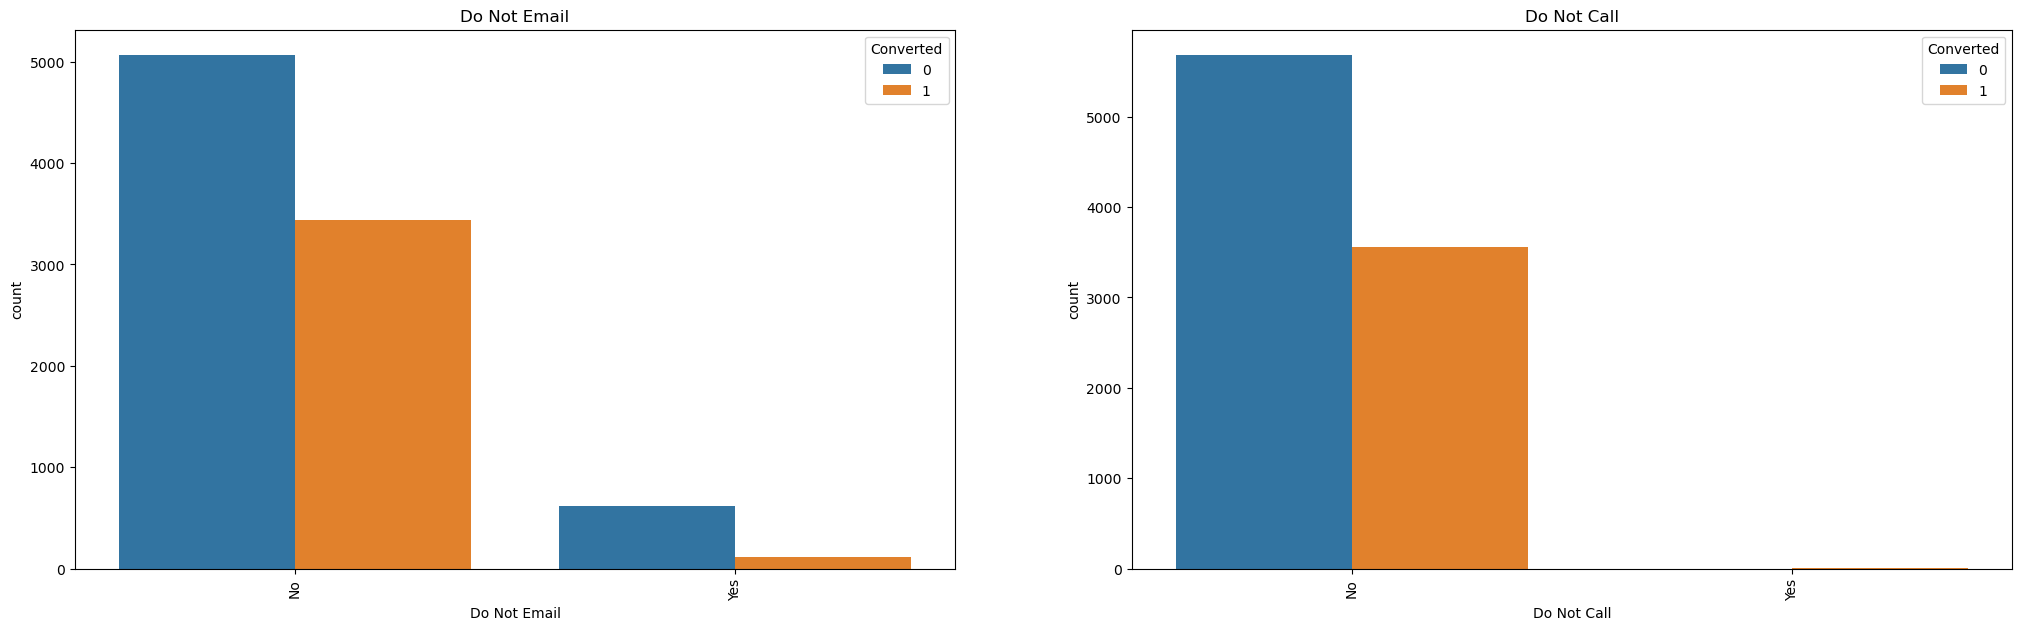

In [456]:
plt.figure(figsize = (25,7))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.show()

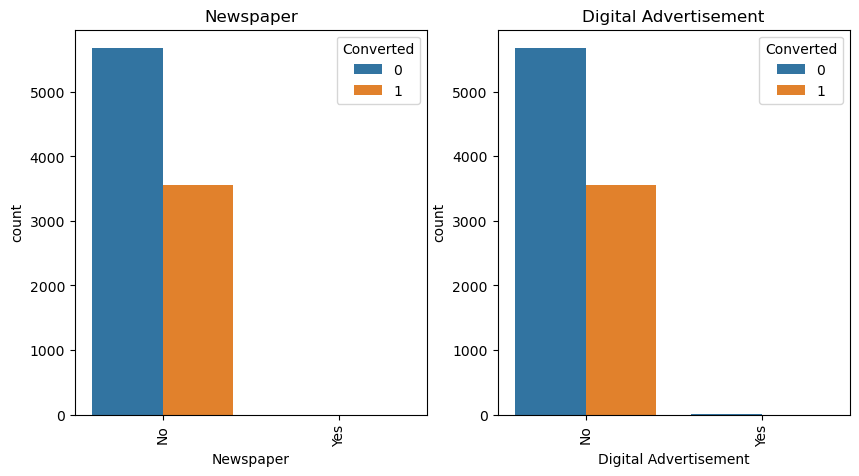

In [457]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

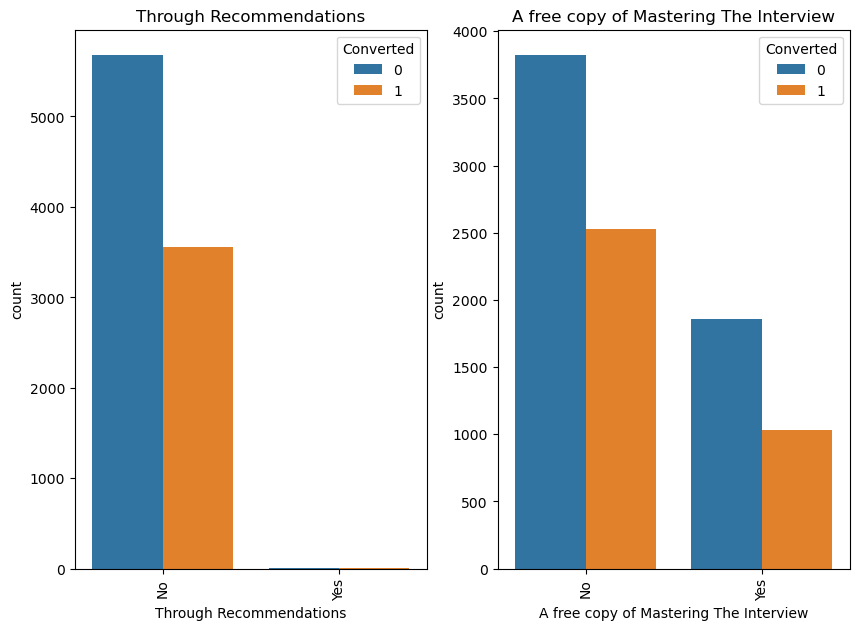

In [458]:
plt.figure(figsize = (10,7))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

In [459]:
objectcols=df.loc[:,df.dtypes=='object']
objectcols.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [460]:
object_cols=list(objectcols)

In [461]:
print(object_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [462]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in object_cols:
    df[i]=label_encoder.fit_transform(df[i])
df.shape

(9240, 29)

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   int64  
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   int64  
 3   Lead Source                                    9240 non-null   int64  
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [464]:
# Create dummy variables 
dummy = pd.get_dummies(df[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
dummy

,Lead Origin,Specialization,Lead Source,Do Not Email,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,0,15,6,0,10,4,0,8
1,0,15,7,0,5,4,0,4
2,1,1,1,0,5,3,1,4
3,1,11,1,0,13,4,0,8
4,1,15,3,0,1,4,0,8
...,...,...,...,...,...,...,...,...
9235,1,8,1,1,4,4,0,3
9236,1,11,1,0,12,4,1,12
9237,1,1,1,1,12,4,1,12
9238,1,7,3,0,12,6,0,12


In [465]:
# Add the results to the master dataframe
df_dum = pd.concat([df, dummy], axis=1)
df_dum

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin,Specialization,Lead Source,Do Not Email,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,4427,660737,0,6,0,0,0,0.0,0,0.00,...,0,8,0,15,6,0,10,4,0,8
1,1554,660728,0,7,0,0,0,5.0,674,2.50,...,0,4,0,15,7,0,5,4,0,4
2,5140,660727,1,1,0,0,1,2.0,1532,2.00,...,1,4,1,1,1,0,5,3,1,4
3,467,660719,1,1,0,0,0,1.0,305,1.00,...,0,8,1,11,1,0,13,4,0,8
4,1874,660681,1,3,0,0,1,2.0,1428,1.00,...,0,8,1,15,3,0,1,4,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,951,579564,1,1,1,0,1,8.0,1845,2.67,...,0,3,1,8,1,1,4,4,0,3
9236,4782,579546,1,1,0,0,0,2.0,238,2.00,...,1,12,1,11,1,0,12,4,1,12
9237,6184,579545,1,1,1,0,0,2.0,199,2.00,...,1,12,1,1,1,1,12,4,1,12
9238,3055,579538,1,3,0,0,1,3.0,499,3.00,...,0,12,1,7,3,0,12,6,0,12


In [466]:
df_dum = df_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 
                      'Specialization', 'What is your current occupation',
                      'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [467]:
# Let's take a look at the dataset again

df_dum.head()

,Prospect ID,Lead Number,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What matters most to you in choosing a course,Search,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque
0,4427,660737,0,0,0.0,0,0.0,37,0,0,...,0,0,0,0,0,0,0,0,4,0
1,1554,660728,0,0,5.0,674,2.5,12,0,0,...,0,0,0,0,0,0,0,0,4,0
2,5140,660727,0,1,2.0,1532,2.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
3,467,660719,0,0,1.0,305,1.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1874,660681,0,1,2.0,1428,1.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0


# Test-Train Split
The next step is to split the dataset into training an testing sets.

In [468]:
# Import the required library
from sklearn.model_selection import train_test_split

In [469]:
X = df_dum.drop(['Converted'], axis= 1)
X.head()

,Prospect ID,Lead Number,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque
0,4427,660737,0,0.0,0,0.0,37,0,0,0,0,0,0,0,0,0,0,0,4,0
1,1554,660728,0,5.0,674,2.5,12,0,0,0,0,0,0,0,0,0,0,0,4,0
2,5140,660727,0,2.0,1532,2.0,12,0,0,0,0,0,0,0,0,0,0,0,0,0
3,467,660719,0,1.0,305,1.0,12,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1874,660681,0,2.0,1428,1.0,12,0,0,0,0,0,0,0,0,0,0,0,0,0


In [470]:
# Putting the target variable in y
y = df_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [471]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

# Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [472]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [473]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Prospect ID,Lead Number,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque
3112,4168,630013,0,0.007968,0.182867,0.083333,12,0,0,0,0,0,0,0,0,0,0,0,0,0
8413,9130,585643,0,0.019920,0.679538,0.208333,12,0,0,0,0,0,0,0,0,0,0,0,0,0
2961,9145,631406,0,0.011952,0.553928,0.041667,12,0,0,0,0,0,0,0,0,0,0,0,0,0
24,8568,660458,0,0.023904,0.504660,0.062500,12,0,0,0,0,0,0,0,0,0,0,0,0,0
2740,1681,633361,0,0.011952,0.445184,0.125000,12,0,0,0,0,0,0,0,0,0,0,0,3,0


# Looking at the correlations
Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [474]:
df_dum.corr()

,Prospect ID,Lead Number,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What matters most to you in choosing a course,Search,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque
Prospect ID,1.000000,-0.005418,-0.010503,-0.012420,-0.002535,0.000803,-0.006848,-0.005961,0.012265,0.002148,...,-0.007905,-0.002873,0.012530,0.003905,0.012064,NaN,NaN,NaN,0.002825,NaN
Lead Number,-0.005418,1.000000,0.011913,0.025157,0.022223,0.020329,0.058808,-0.034898,0.049761,-0.012777,...,-0.012294,-0.003154,0.004597,-0.017713,-0.005777,NaN,NaN,NaN,0.034514,NaN
Do Not Call,-0.010503,0.011913,1.000000,0.018581,0.003221,0.006801,-0.005918,0.007106,-0.009481,-0.000573,...,-0.000216,-0.000153,-0.000153,-0.000306,-0.000405,NaN,NaN,NaN,-0.016109,NaN
Converted,-0.012420,0.025157,0.018581,1.000000,0.030395,0.362483,-0.003328,0.055842,-0.329350,-0.002261,...,0.003465,-0.008238,-0.008238,-0.005789,0.018607,NaN,NaN,NaN,-0.130458,NaN
TotalVisits,-0.002535,0.022223,0.003221,0.030395,1.000000,0.221240,0.512125,-0.378792,-0.046254,0.049527,...,0.033757,0.035744,0.014153,0.023991,0.034191,NaN,NaN,NaN,-0.226078,NaN
Total Time Spent on Website,0.000803,0.020329,0.006801,0.362483,0.221240,1.000000,0.320361,-0.426426,-0.150857,0.012654,...,0.011326,0.006195,0.025142,0.007607,0.023186,NaN,NaN,NaN,-0.237923,NaN
Page Views Per Visit,-0.006848,0.058808,-0.005918,-0.003328,0.512125,0.320361,1.000000,-0.584526,-0.075551,0.033258,...,0.023232,0.000665,0.004691,0.021945,0.019822,NaN,NaN,NaN,-0.345651,NaN
Country,-0.005961,-0.034898,0.007106,0.055842,-0.378792,-0.426426,-0.584526,1.000000,0.070796,-0.024585,...,-0.009286,-0.006566,-0.006566,-0.013134,-0.017378,NaN,NaN,NaN,0.409276,NaN
What matters most to you in choosing a course,0.012265,0.049761,-0.009481,-0.329350,-0.046254,-0.150857,-0.075551,0.070796,1.000000,-0.000651,...,0.006680,0.016151,-0.006704,-0.001981,-0.009102,NaN,NaN,NaN,0.365444,NaN
Search,0.002148,-0.012777,-0.000573,-0.002261,0.049527,0.012654,0.033258,-0.024585,-0.000651,1.000000,...,0.188573,0.267073,-0.000405,0.132950,0.302318,NaN,NaN,NaN,0.009558,NaN


# Step 2: Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [475]:
# Import 'LogisticRegression' and create a LogisticRegression object


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [476]:
# Import RFE
from sklearn.feature_selection import RFE

In [477]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create an imputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the data
X_train_imputed = imputer.fit_transform(X_train)





In [478]:
# Now apply RFE
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train_imputed, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [479]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Prospect ID', True, 1),
 ('Lead Number', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Country', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Search', True, 1),
 ('Magazine', False, 6),
 ('Newspaper Article', True, 1),
 ('X Education Forums', False, 2),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('Receive More Updates About Our Courses', False, 3),
 ('Update me on Supply Chain Content', False, 4),
 ('Get updates on DM Content', True, 1),
 ('City', True, 1),
 ('I agree to pay the amount through cheque', False, 5)]

In [480]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

We have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [481]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [482]:
# Importing statsmodels
import statsmodels.api as sm

In [483]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Add a constant column to X_train for the intercept
X_train_sm = sm.add_constant(X_train_imputed)

# Fit the logistic regression model
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Output the summary
res.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3341.9
Date:                Tue, 30 Jul 2024   Deviance:                       6683.8
Time:                        19:44:17   Pearson chi2:                 6.65e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2614
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1094      0.807     -5.091      0.000      -5.692      -2.527
x1         -1.179e-05   1.13e-05     -1.048      0.295   -3.38e-05    1.03e-05
x2          3.462e-06   1.29e-06      2.676      0.007    9.27e-07       6e-06
x3            20.6534   1.91e+04      0.001      0.999   -3.74e+04    3.75e+04
x4             4.7522      2.165      2.195      0.028       0.508       8.996
x5             4.5494      0.155     29.420      0.000       4.246       4.853
x6            -1.8716      0.499     -3.751      0.000      -2.850      -0.894
x7             0.0609      0.004     16.156      0.000       0.054       0.068
x8            -0.6074      0.028    -21.442      0.000      -0.663      -0.552
x9            -1.1232      0.942     -1.193      0.233      -2.969       0.722
x10           21.5812   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
x11          -23.7252   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
x12           -0.3657      1.501     -0.244      0.808      -3.307       2.576
x13            2.0485      1.348      1.519      0.129      -0.594       4.691
x14                 0          0        nan        nan           0           0
x15           -0.0327      0.015     -2.169      0.030      -0.062      -0.003
==============================================================================
"""

let's also look at the VIFs.

In [484]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [485]:
# Make a VIF dataframe for all the variables present

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Remove infinite values
X_train_imputed[np.isinf(X_train_imputed)] = np.nan
X_train_imputed = np.nan_to_num(X_train_imputed, nan=np.nanmean(X_train_imputed))

# Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train_imputed, i) for i in range(X_train_imputed.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
1,Lead Number,17.31
6,Country,7.09
5,Page Views Per Visit,4.14
0,Prospect ID,3.99
14,City,3.23
4,Total Time Spent on Website,2.27
3,TotalVisits,1.92
7,What matters most to you in choosing a course,1.69
8,Search,1.03
12,Through Recommendations,1.02


In [486]:
X_train.drop('TotalVisits', axis = 1, inplace = True)

In [487]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Add a constant column to X_train for the intercept
X_train_sm = sm.add_constant(X_train_imputed)

# Fit the logistic regression model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()

# Output the summary
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3345.4
Date:                Tue, 30 Jul 2024   Deviance:                       6690.7
Time:                        19:44:20   Pearson chi2:                 6.64e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2606
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0769      0.807     -5.054      0.000      -5.658      -2.496
x1         -1.165e-05   1.12e-05     -1.036      0.300   -3.37e-05    1.04e-05
x2          3.468e-06   1.29e-06      2.682      0.007    9.34e-07       6e-06
x3            20.6788   1.92e+04      0.001      0.999   -3.77e+04    3.77e+04
x4             4.5528      0.154     29.473      0.000       4.250       4.856
x5            -1.4065      0.450     -3.129      0.002      -2.288      -0.525
x6             0.0600      0.004     16.023      0.000       0.053       0.067
x7            -0.6061      0.028    -21.416      0.000      -0.662      -0.551
x8            -1.0798      0.945     -1.143      0.253      -2.932       0.772
x9            21.5531   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
x10          -23.6267   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
x11           -0.3923      1.501     -0.261      0.794      -3.334       2.549
x12            2.0661      1.347      1.534      0.125      -0.573       4.705
x13                 0          0        nan        nan           0           0
x14           -0.0335      0.015     -2.225      0.026      -0.063      -0.004
==============================================================================
"""

In [488]:
# Make a VIF dataframe for all the variables present

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Remove infinite values
X_train_imputed[np.isinf(X_train_imputed)] = np.nan
X_train_imputed = np.nan_to_num(X_train_imputed, nan=np.nanmean(X_train_imputed))

# Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train_imputed, i) for i in range(X_train_imputed.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
1,Lead Number,17.14
5,Country,7.05
0,Prospect ID,3.99
4,Page Views Per Visit,3.64
13,City,3.22
3,Total Time Spent on Website,2.26
6,What matters most to you in choosing a course,1.69
7,Search,1.03
11,Through Recommendations,1.02
2,Do Not Call,1.00


Step 3: Model Evaluation
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [489]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

3112    0.376318
8413    0.797143
2961    0.766669
24      0.739516
2740    0.638894
489     0.558098
9116    0.485941
4176    0.395929
8537    0.719621
6267    0.212836
dtype: float64

In [490]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.37631824, 0.79714334, 0.76666856, 0.73951582, 0.63889424,
       0.55809763, 0.48594069, 0.3959293 , 0.71962136, 0.21283596])

In [491]:
## Creating a dataframe with the actual conversion flag and the predicted probabilities


In [492]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.376318
1,1,0.797143
2,1,0.766669
3,1,0.739516
4,0,0.638894


In [493]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted
0,0,0.376318,0
1,1,0.797143,1
2,1,0.766669,1
3,1,0.739516,1
4,0,0.638894,1


In [494]:
from sklearn import metrics

In [495]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3202,  752],
       [ 850, 1664]])

In [496]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7523191094619666

In [497]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [498]:
# Calculate the sensitivity

TP/(TP+FN)

0.6618933969769292

In [499]:
# Calculate the specificity

TN/(TN+FP)

0.8098128477491148

Optimise the Cut off ROC Curve

In [500]:


# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [507]:
nan_rows = y_train_pred_final[y_train_pred_final.isnull().any(axis=1)]
y_train_pred_final_cleaned = y_train_pred_final.dropna()


# Calculate the ROC curve with the cleaned data
fpr, tpr, thresholds = metrics.roc_curve(
    y_train_pred_final_cleaned['Converted'],
    y_train_pred_final_cleaned['Conversion_Prob'],
    drop_intermediate=False
)

In [508]:

import matplotlib.pyplot as plt

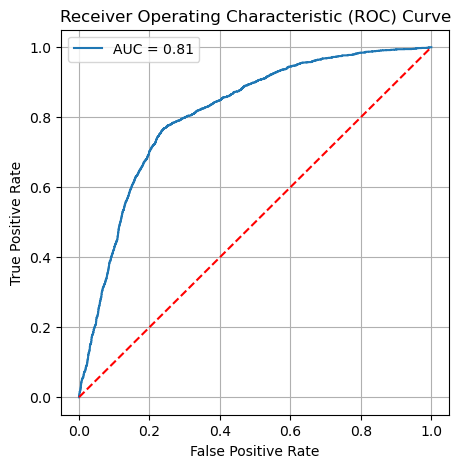

In [517]:
def draw_roc(actual, probs):
    # Remove rows with NaN values
    mask = ~np.isnan(actual) & ~np.isnan(probs)
    actual_cleaned = actual[mask]
    probs_cleaned = probs[mask]
    
    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = metrics.roc_curve(actual_cleaned, probs_cleaned, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual_cleaned, probs_cleaned)
     # Plotting the ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()
   

# Example usage:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])


# Step 4: Making Predictions on the Test Set
Let's now make predicitons on the test set.

In [519]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [520]:
# Substituting all the columns in the final train model
col = X_train.columns

In [521]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Prospect ID,Lead Number,Do Not Call,Total Time Spent on Website,Page Views Per Visit,Country,What matters most to you in choosing a course,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Get updates on DM Content,City
567,1.0,2234,654415,0,0.147359,0.166667,12,0,0,0,0,0,0,0,0
2303,1.0,6880,637416,0,0.688859,0.083333,12,0,0,0,0,0,0,0,0
1523,1.0,2987,644173,0,0.596538,0.125000,12,0,0,0,0,0,0,0,4
6923,1.0,9197,596521,0,0.083000,0.208333,12,0,0,0,0,0,0,0,5
7841,1.0,966,589639,0,0.311585,0.083333,12,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,1.0,8262,580428,0,0.118065,0.041667,12,3,0,0,0,0,0,0,7
1049,1.0,4092,649018,0,0.703506,0.166667,12,0,0,0,0,0,0,0,4
7778,1.0,5199,590171,0,0.135375,0.083333,12,0,0,0,0,0,0,0,0
6432,1.0,876,600646,0,0.000000,0.000000,37,0,0,0,0,0,0,0,4


In [522]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.336948
1,0,0.857237
2,0,0.777028
3,0,0.185747
4,0,0.477798


In [523]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.336948,0
1,0,0.857237,1
2,0,0.777028,1
3,0,0.185747,0
4,0,0.477798,1
...,...,...,...
2767,0,0.046790,0
2768,0,0.843004,1
2769,0,0.294922,0
2770,0,0.520627,1


In [524]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7492784992784993

In [525]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1277,  448],
       [ 247,  800]])

In [526]:

# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [527]:
TP/(TP+FN)

0.7640878701050621

In [528]:
# Calculating the specificity
TN/(TN+FP)

0.7402898550724638


# Precision-Recall

In [529]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3202,  752],
       [ 850, 1664]])

In [530]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6887417218543046

In [531]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6618933969769292

Precision and recall tradeoff

In [532]:
from sklearn.metrics import precision_recall_curve

In [533]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       1
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: Predicted, Length: 6468, dtype: int64)

In [536]:

mask = ~np.isnan(y_train_pred_final['Converted']) & ~np.isnan(y_train_pred_final['Conversion_Prob'])
converted_cleaned = y_train_pred_final['Converted'][mask]
conversion_prob_cleaned = y_train_pred_final['Conversion_Prob'][mask]

# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(converted_cleaned, conversion_prob_cleaned)

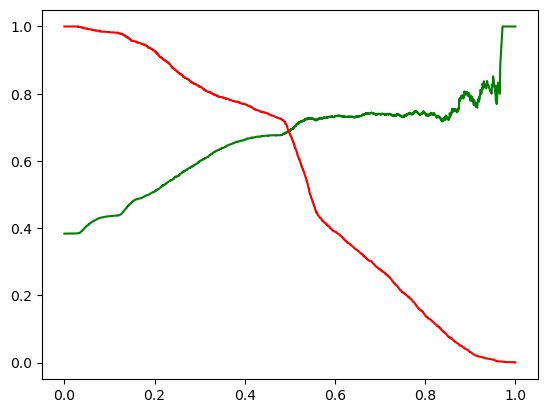

In [538]:
plt.plot(thresholds, precision[:-1], "g-")
plt.plot(thresholds, recall[:-1], "r-")
plt.show()

In [539]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,final_predicted
0,0,0.376318,0,0
1,1,0.797143,1,1
2,1,0.766669,1,1
3,1,0.739516,1,1
4,0,0.638894,1,1


In [540]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.756338899196042

In [541]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3024,  930],
       [ 646, 1868]])

In [542]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [543]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.6676197283774125

In [545]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   int64  
 1   Lead Number                                    9240 non-null   int64  
 2   Do Not Call                                    9240 non-null   int64  
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Country                                        9240 non-null   int64  
 8   What matters most to you in choosing a course  9240 non-null   int64  
 9   Search                                         9240 

In [544]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7430389817024662

In [548]:
## Conclusion
# Hence variables that mattered most are as follows-     
# Total Time Spent on Website
# Page Views Per Visit
# Do Not Email
# What is your current occupation_Working Professional
# Lead Origin_Landing Page Submission
# Specialization_Industry Specializations
# A free copy of Mastering The Interview
# TotalVisits
